In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

170508288/170498071 [==============================] - 5s 0us/step


In [2]:
def visualize_and_correct_label(wrong_id):
    for item in wrong_id:
        image_id = item['id']
        correct_answer = item['answer']
        
        # Display the image
        plt.imshow(x_test[image_id])
        plt.title(f"Original Label: {class_names[y_test[image_id][0]]}")
        plt.show()
        
        # Get the actual current label
        current_label = class_names[y_test[image_id][0]]
        
        if current_label != correct_answer:
            # Update the label to the correct one
            y_test[image_id] = class_names.index(correct_answer)
            print(f"'{correct_answer}'로 변경. ID: {image_id}")
        else:
            print(f"{image_id}의 라벨이 이미 '{current_label}'입니다.")


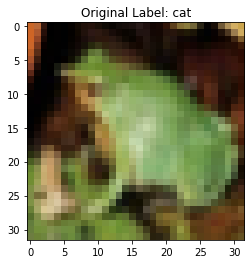

'frog'로 변경. ID: 2405


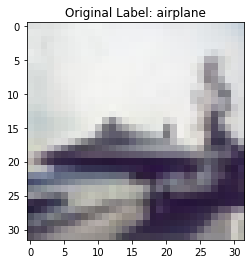

'ship'로 변경. ID: 6877


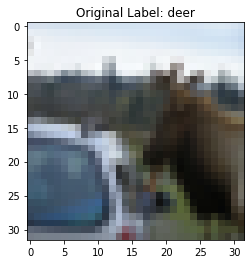

'horse'로 변경. ID: 8058


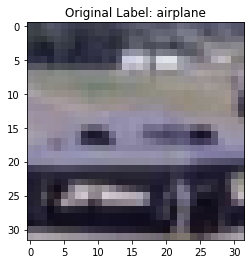

'automobile'로 변경. ID: 2532


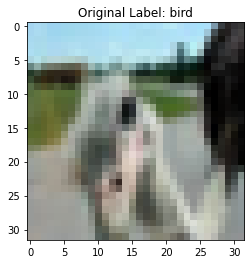

'horse'로 변경. ID: 7657


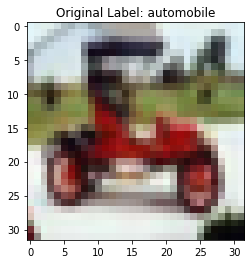

'truck'로 변경. ID: 1969


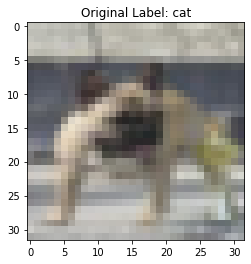

'dog'로 변경. ID: 2804


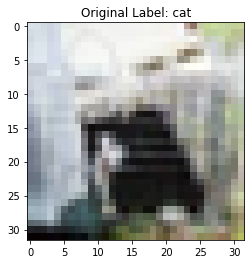

'truck'로 변경. ID: 6792


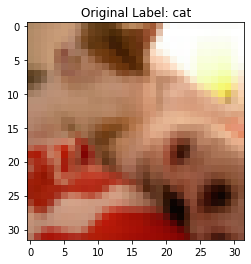

'dog'로 변경. ID: 1227


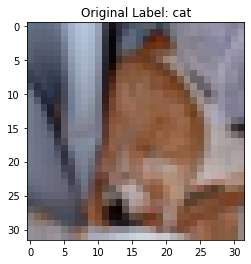

'dog'로 변경. ID: 5191


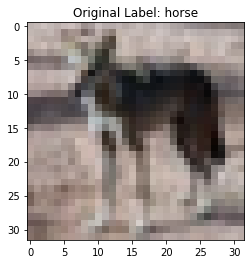

'deer'로 변경. ID: 5690


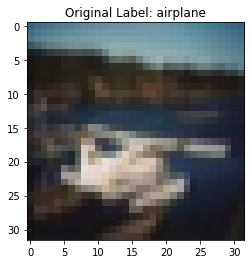

'ship'로 변경. ID: 1718


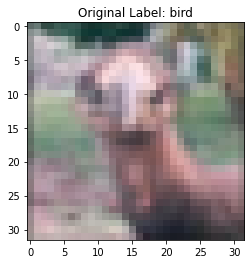

'deer'로 변경. ID: 2592


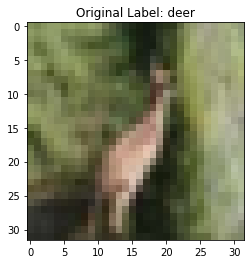

'bird'로 변경. ID: 4794


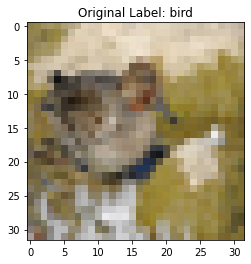

'cat'로 변경. ID: 5960


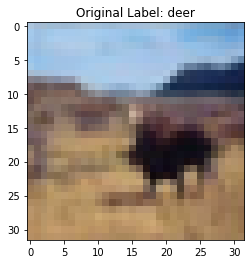

'bird'로 변경. ID: 165


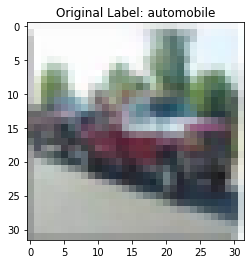

'truck'로 변경. ID: 9227


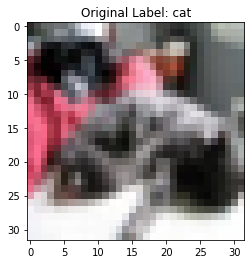

'dog'로 변경. ID: 5632


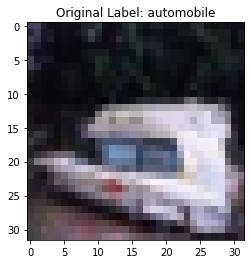

'truck'로 변경. ID: 9352


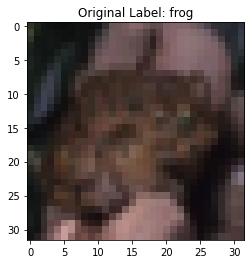

'cat'로 변경. ID: 7846


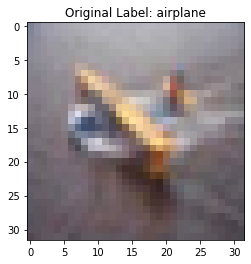

'ship'로 변경. ID: 6966


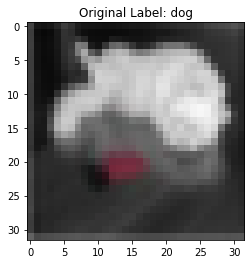

'cat'로 변경. ID: 5468


In [3]:
wrong_id = [
  {'id': 2405, 'answer': 'frog'},
  {'id': 6877, 'answer': 'ship'},
  {'id': 8058, 'answer': 'horse'},
  {'id': 2532, 'answer': 'automobile'},
  {'id': 7657, 'answer': 'horse'},
  {'id': 1969, 'answer': 'truck'},
  {'id': 2804, 'answer': 'dog'},
  {'id': 6792, 'answer': 'truck'},
  {'id': 1227, 'answer': 'dog'},
  {'id': 5191, 'answer': 'dog'},
  {'id': 5690, 'answer': 'deer'},
  {'id': 1718, 'answer': 'ship'},
  {'id': 2592, 'answer': 'deer'},
  {'id': 4794, 'answer': 'bird'},
  {'id': 5960, 'answer': 'cat'},
  {'id': 165, 'answer': 'bird'},
  {'id': 9227, 'answer': 'truck'},
  {'id': 5632, 'answer': 'dog'},
  {'id': 9352, 'answer': 'truck'},
  {'id': 7846, 'answer': 'cat'},
  {'id': 6966, 'answer': 'ship'},
  {'id': 5468, 'answer': 'cat'}
]
visualize_and_correct_label(wrong_id)

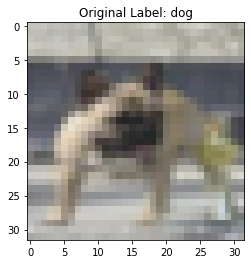

In [4]:
plt.imshow(x_test[2804])
plt.title(f"Original Label: {class_names[y_test[2804][0]]}")
plt.show()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
!pip install keras-tuner --upgrade

     |████████████████████████████████| 129 kB 4.4 MB/s            


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = tf.keras.Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(units=hp.Int('units', min_value=128, max_value=512, step=64), activation='relu'))
    
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(
                    hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [8]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2, 
    directory='./best_model/1', 
    project_name='cifar10_tuning'
)

/tmp/ipykernel_50/1703722326.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [9]:
tuner.search(x_train, y_train,
             epochs=10,
             validation_data=(x_test, y_test),
             batch_size=64)

best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.7175499796867371

Best val_accuracy So Far: 0.7263000011444092
Total elapsed time: 00h 13m 01s


In [10]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [11]:
history = best_model.fit(x_train, y_train,
                         epochs=20,
                         validation_data=(x_test, y_test),
                         batch_size=64)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2198 - accuracy: 0.9270 - val_loss: 0.9810 - val_accuracy: 0.7096
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1824 - accuracy: 0.9404 - val_loss: 1.0216 - val_accuracy: 0.7073
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1562 - accuracy: 0.9497 - val_loss: 1.0408 - val_accuracy: 0.7328
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1363 - accuracy: 0.9554 - val_loss: 0.9677 - val_accuracy: 0.7318
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1167 - accuracy: 0.9621 - val_loss: 1.0118 - val_accuracy: 0.7347
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1064 - accuracy: 0.9657 - val_loss: 1.1099 - val_accuracy: 0.7244
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0976 - accuracy: 0.9690 - val_loss: 1.0913 - val_accuracy: 0.7393
Epoch 

In [12]:
best_model.save('./mlops/best_model/2/cifar10_best_model')

INFO:tensorflow:Assets written to: ./mlops/best_model/2/cifar10_best_model/assets


![docker](./docker.png)